In [9]:
import pandas as pd
customer_data = pd.read_csv('./Mall_customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data = customer_data.select_dtypes(include=['int64', 'float64'])
features = customer_data.iloc[:, 1:5]
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


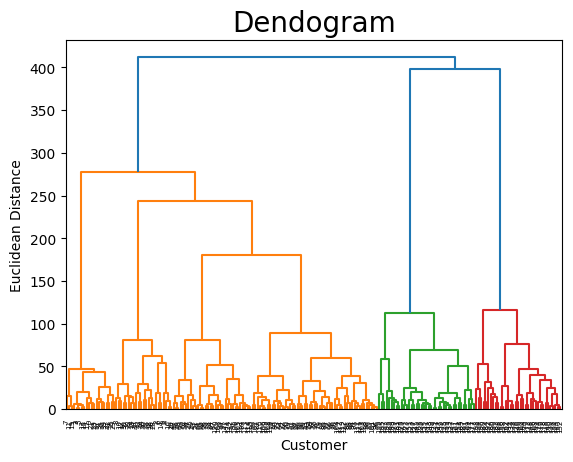

In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendogram', fontsize= 20)
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

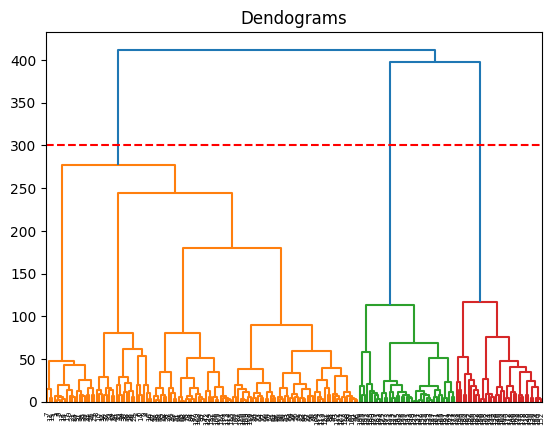

In [12]:
plt.title('Dendograms')
dend = sch.dendrogram(sch.linkage(features, method='ward'))
plt.axhline(y=300, c='red', linestyle='--')
plt.show()

c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


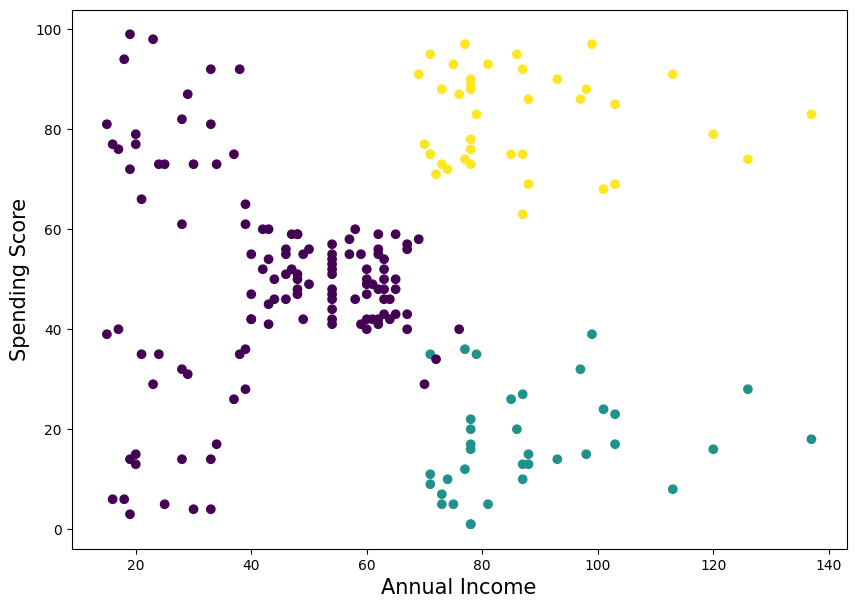

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(features)

plt.figure(figsize=(10, 7))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster.labels_)
plt.xlabel('Annual Income', fontsize= 15)
plt.ylabel('Spending Score', fontsize= 15)
plt.show()